#  Deterministic Model

This notebook allows you to explore the determistic model presented in chapter 4, and get to know the [XPPjl](https://github.com/novakgroupoxford/XPPjl)-package.

First, we have to load our dependencies...

In [3]:
# Load XPPjl
using XPP
#Load the plotting package
using PyPlot

The XPPjl-package allows you to read in regular ode-files (as those used in XPPAut).
We'll now load the file [`deterministic.ode`](http://localhost:8888/edit/Chapter4/deterministic.ode) (you can click on the file name and convince yourself that it's a plain ode-file.)...

In [4]:
M = fromOdeFile("deterministic.ode")

deterministic_xppjl
------------------------------------------------------------
ODES:
	AurBc = (kloc + kloc_cdk*Cdk1)*(AurBtot - AurBc) - krem*AurBc
	APC = (kdiss + kimcc)*(1 - APC) - kass*APC*MCCfree
	CycB = kscycb - (kdcycb + kdcycb_c*APC)*CycB
	uKT = kerr*AurBa/(1 + BN2)*(KTtot - uKT) - katt*uKT
	MCCfree = kamcc_cdk*AurBa/(1 + BN2)/(Jamcc + AurBa/(1 + BN2))*Cdk1*uKT*(MCCtot - MCCfree - (1- APC))  + kdiss*(1 - APC) - kass*APC*MCCfree - kimcc*MCCfree
------------------------------------------------------------
ALGEBRAIC EQUATIONS:
	AurBa = AurBc - Stretch*AurBc*(KTtot - uKT)^N/(J^N + (KTtot - uKT)^N)
	Cdk1 = CycB/(1 + RO)
------------------------------------------------------------
AUXILLIARY VARIABLES:
	CycBrate = -(kscycb - (kdcycb + kdcycb_c*APC)*CycB)
	AurBa = AurBc - Stretch*AurBc*(KTtot - uKT)^N/(J^N + (KTtot - uKT)^N)
------------------------------------------------------------
INITIALS:
	AurBc:	1.0
	APC:	0.015
	CycB:	1.0
	uKT:	1.0
	MCCfree:	0.16
------------------------------

XPPjl reads in the ode file, and creates a `Model`-object, which is a set of well-defined dictionaries, containing odes, auxilliary and algebraic equations, initial conditions, parameters and settings.

## Simulate

XPPjl allows us to simulate the model, without opening XPPAut. All we have to do is to give it the Model-object, a simulation name, and an array of desired output-timepoints..

In [6]:
# Simulate control
simulate!(M, "control", collect(0:0.01:30));

### Accessing simulation data

XPPjl saves simulation data, parameters used in a specific simulation and initial conditions in the Model-object...

In [12]:
#Show simulations
M.sims

Dict{Any,Any} with 1 entry:
  "control" => 

control
------------------------------------------------------------
INITIALS:
	AurBc:	1.0
	APC:	0.015
	CycB:	1.0
	uKT:	1.0
	MCCfree:	0.16
------------------------------------------------------------
PARAMETERS:
	kdcycb:                                  0.004
	kloc:                                    0.0
	kimcc:                                   0.5
	kscycb:                                  0.004
	kdiss:                                   0.01
	N:                                       4.0
	krem:                                    2.5
	BN2:                                     0.0
	KTtot:                                   1.0
	Jamcc:                                   0.1
	katt:                                    0.5
	Stretch:                                 1.0
	kerr:                                    0.66
	MCCtot:                                  1.2
	kamcc_cdk:                               15.0
	RO:                                      0.0
	J:                                       0.4

In [15]:
# The simulation data can be accessed like this...
M.sims["control"].D

Dict{Any,Array{Float64,1}} with 8 entries:
  "AurBc"    => [1.0,0.999999,0.999999,0.999996,0.999994,0.999992,0.999986,0.99…
  "CycBrate" => [0.0075,0.00758318,0.00759577,0.00762121,0.00763032,0.00763101,…
  "AurBa"    => [1.0,0.999999,0.999999,0.999996,0.999993,0.99999,0.999981,0.999…
  "APC"      => [0.015,0.0151681,0.0151937,0.0152459,0.0152653,0.0152673,0.0152…
  "CycB"     => [1.0,0.999925,0.999906,0.999849,0.9998,0.999772,0.999696,0.9996…
  "t"        => [0.0,0.01,0.0124151,0.02,0.0263248,0.03,0.04,0.0422196,0.05,0.0…
  "uKT"      => [1.0,0.995029,0.993837,0.990115,0.987036,0.985258,0.980457,0.97…
  "MCCfree"  => [0.16,0.161808,0.162191,0.163275,0.164062,0.164472,0.165453,0.1…

### Plotting simulation data

Moreover, XPP provides a convenient function that enables you to plot simulations.
All it needs is the Model-object, the simulation name, a list of variables to plot, and a dictionary specifying the colours to be used for plotting.

In [16]:
#Define colours
styles = Dict(
"CycB" => "#04328b", #blue
"APC" => "#670a04", #burgundy
"MCCfree" => "#288805", #green
"AurBc" => "#db0303", #red
"AurBa" => "#37c4a6", #turquoise
"uKT" => "#440091", #purple
)
#Create a list of variable names
var = keys(styles)

Base.KeyIterator for a Dict{ASCIIString,ASCIIString} with 6 entries. Keys:
  "AurBc"
  "AurBa"
  "APC"
  "CycB"
  "MCCfree"
  "uKT"

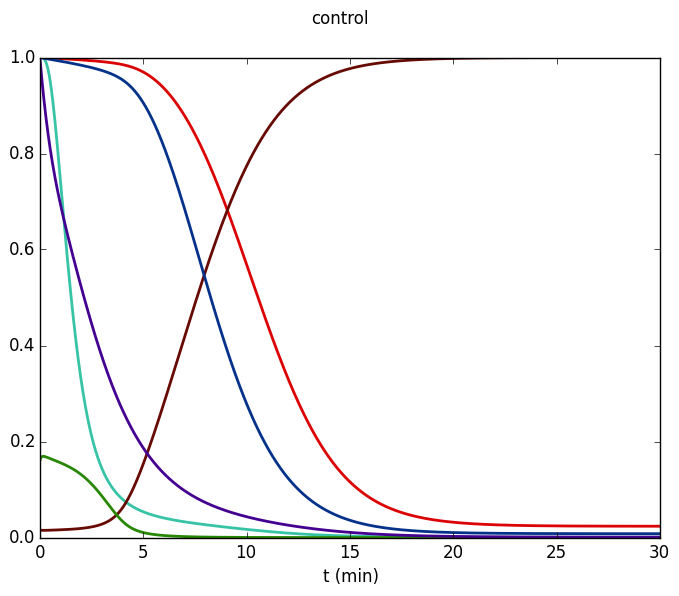

PyObject <matplotlib.text.Text object at 0x7fe26ed7b950>

In [17]:
#Plot
plotModel(M, "control", vars = keys(styles), colors = styles)

## Changing parameters

Changing parameters is easy in XPPjl, just modify the corresponding entry in the Model-object...

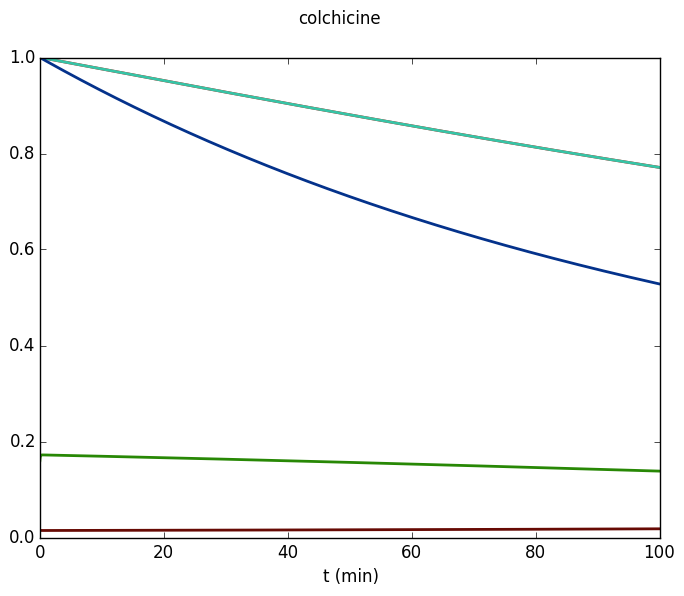

PyObject <matplotlib.text.Text object at 0x7fe26ebfb0d0>

In [22]:
# We'll change katt to 0 to simulate colchicine treatment..
M.pars["katt"] = 0;
#Simulate
simulate!(M, "colchicine", collect(0:0.01:100))
#Plot
plotModel(M, "colchicine", vars = keys(styles), colors = styles)